1) 481712
2) 431094
user 1
absent+present


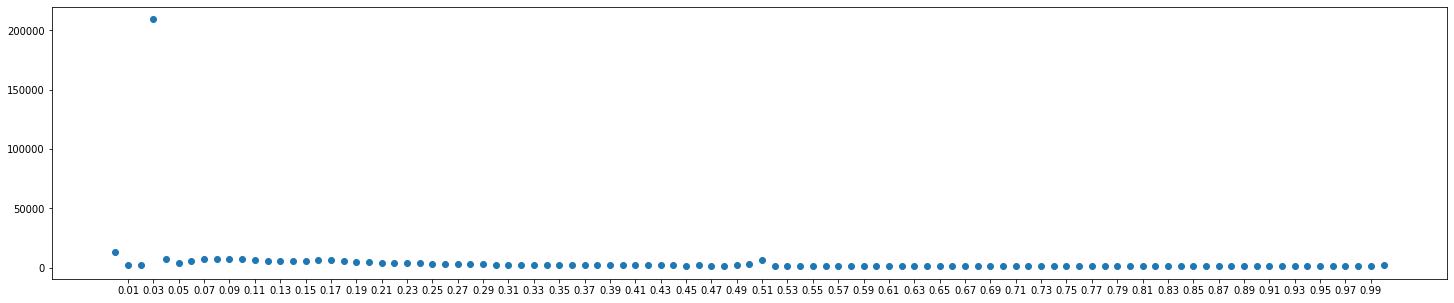

non-absent


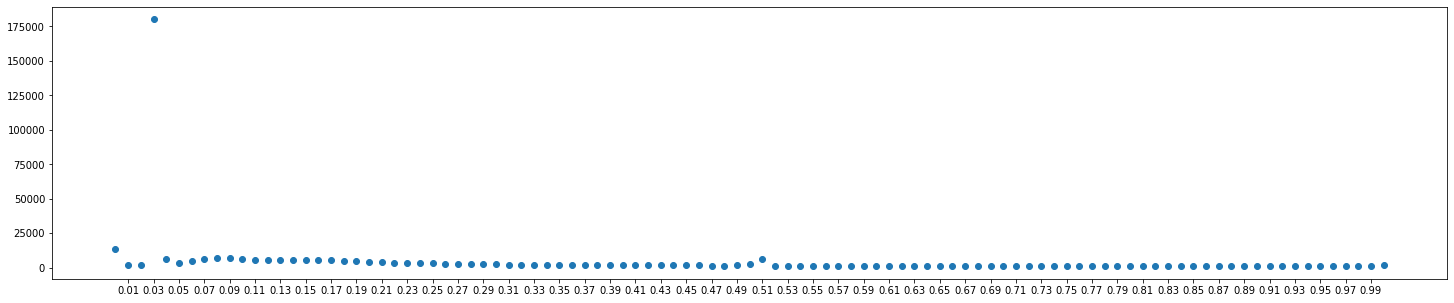

1) 3958
2) 3431
user 2
absent+present


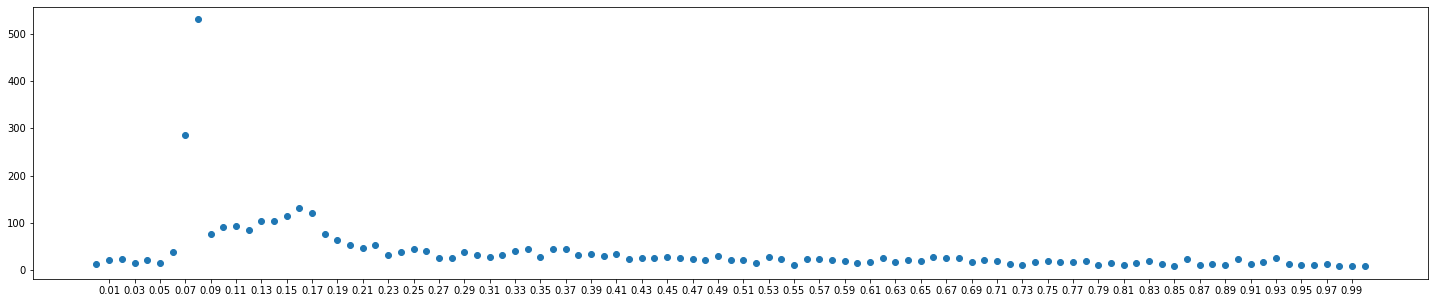

non-absent


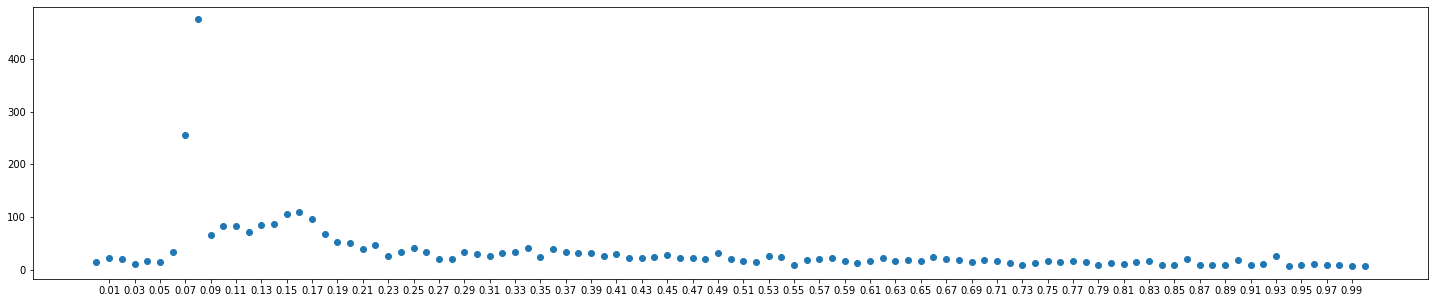

1) 88944
2) 88463
user 3
absent+present


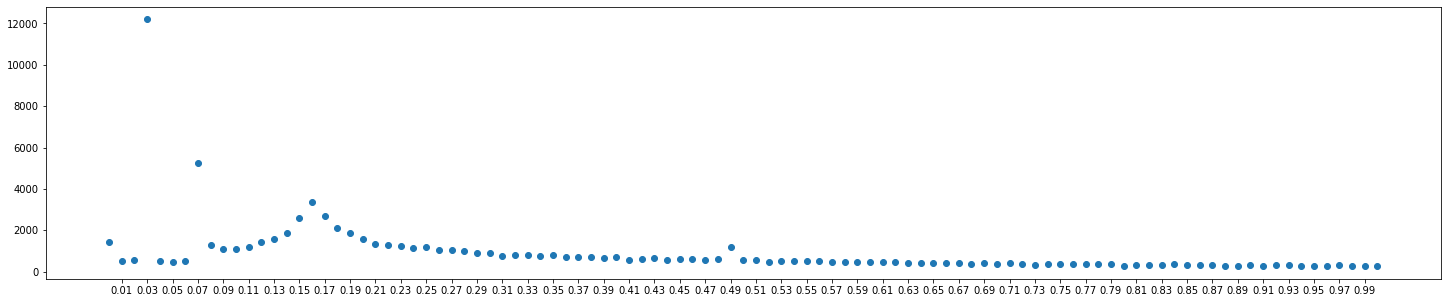

non-absent


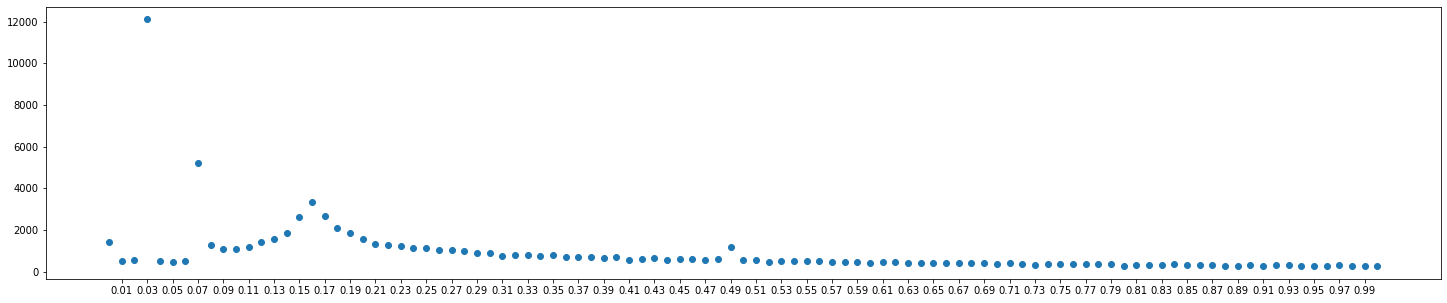

1) 273410
2) 74000
user 4
absent+present


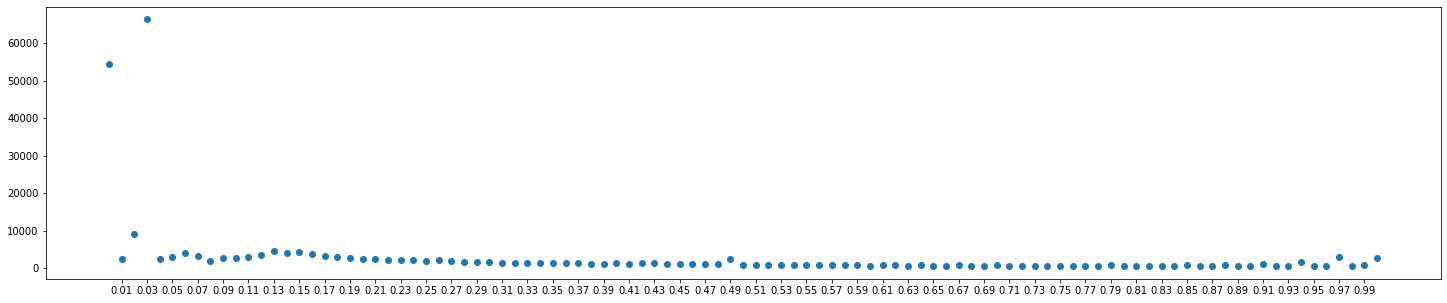

non-absent


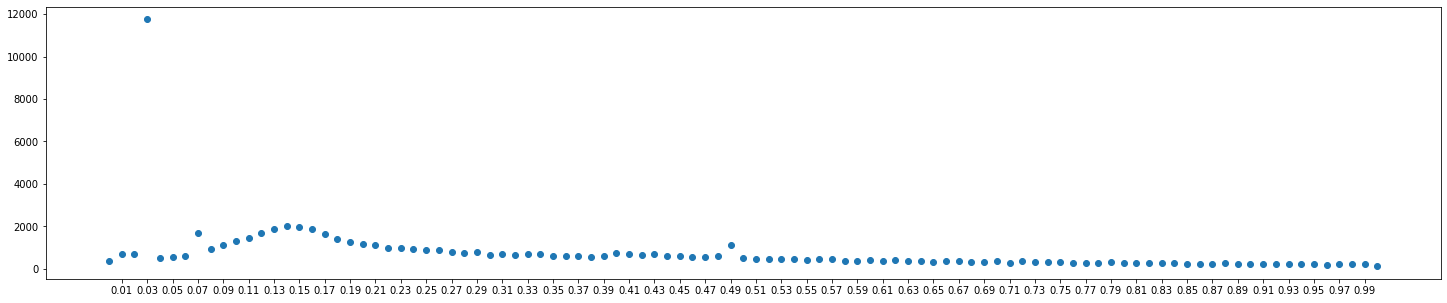

1) 92632
2) 91964
user 5
absent+present


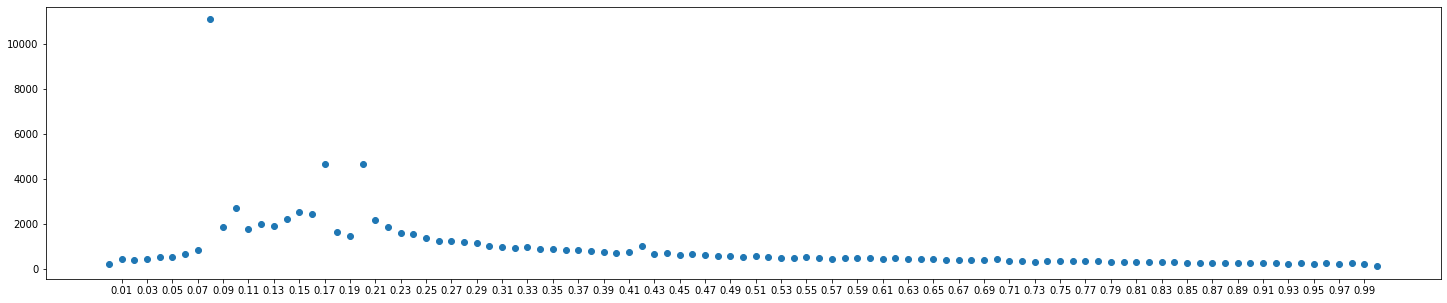

non-absent


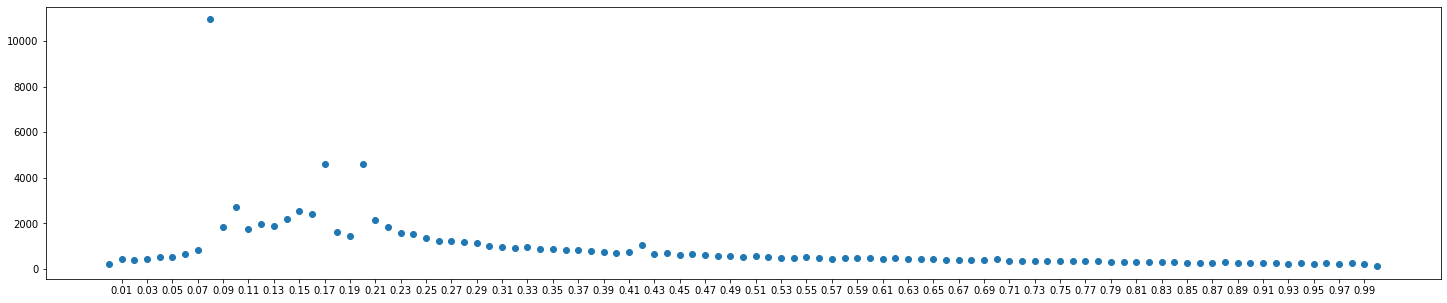

wrong date format
1) 33600
2) 32301
user 7
absent+present


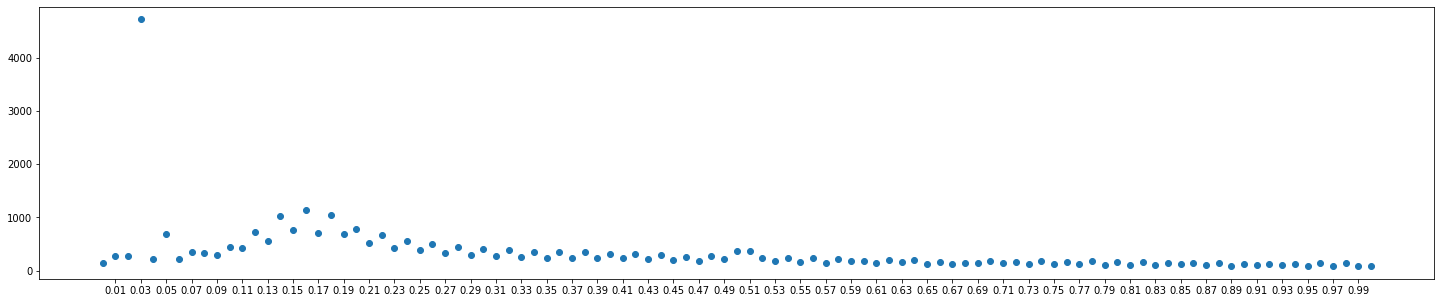

non-absent


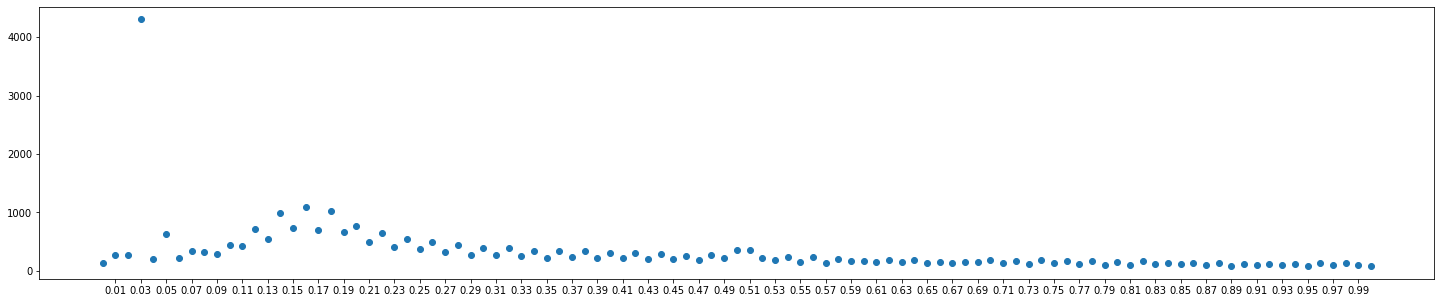

In [11]:
import sqlite3
import datetime
from tabulate import tabulate
import matplotlib.pylab as plt
import numpy as np


def get_time_gaps(id):
    con = sqlite3.connect("user"+str(id)+".sqlite")
    
    cur = con.cursor()
    input_signals = []

    for row in cur.execute('SELECT * FROM signals;'):
        list_row = list(row)
        try:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S')
            print("wrong date format")
        input_signals.append(list_row)
    con.close()
    f = open("results.txt", "a")
    f.write(str(input_signals))
    f.close()
    previous = input_signals[0][1]
    times = {}
    for i in range(1, len(input_signals)):
        gap = (input_signals[i][1]-previous)
        gap = gap.microseconds
        gap = gap / 1000000
        gap = round(gap, 2)
        #gap = str(gap)
        if gap in times:
            times[gap] += 1
        else:
            times[gap] = 1
        previous = input_signals[i][1]
    return times

def get_data(id):
    con = sqlite3.connect("user"+str(id)+".sqlite")
    
    cur = con.cursor()
    input_signals = []
    recorded_images = []
    matched = []

    for row in cur.execute('SELECT * FROM signals;'):
        list_row = list(row)
        try:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S')
            print("wrong date format")
        input_signals.append(list_row)
    


    for row in cur.execute('SELECT id, dateTime, state FROM images;'):
        list_row = list(row)
        try:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            list_row[1] = datetime.datetime.strptime(list_row[1], '%Y-%m-%d %H:%M:%S')
            print("wrong date format")
        recorded_images.append(list_row)

    con.close()



    for i in range(len(recorded_images)-1):
        records_exists = False
        for user_inp in input_signals:
            if ( user_inp[1] >= recorded_images[i][1] and user_inp[1] < recorded_images[i+1][1]):
                matched.append([ recorded_images[i][0], recorded_images[i][1], recorded_images[i][2], user_inp[0], user_inp[1], user_inp[2], user_inp[3] ])
                records_exists = True
        if records_exists == False:
            matched.append([ recorded_images[i][0], recorded_images[i][1], recorded_images[i][2], None, None, None, None ])

    records_exists = False
    for user_inp in input_signals:
        if ( user_inp[1] >= recorded_images[len(recorded_images)-1][1]):
            matched.append([ recorded_images[len(recorded_images)-1][0], recorded_images[len(recorded_images)-1][1], recorded_images[len(recorded_images)-1][2], user_inp[0], user_inp[1], user_inp[2], user_inp[3] ])
            records_exists = True
    if records_exists == False:
        matched.append([ recorded_images[len(recorded_images)-1][0], recorded_images[len(recorded_images)-1][1], recorded_images[len(recorded_images)-1][2], None, None, None, None ])

    count_present_no_input = 0
    count_absent_no_input = 0
    for record in matched:
        if record[2] == 'Present' and record[3] == None:
            count_present_no_input += 1
        if record[2] != 'Present' and record[3] == None:
            count_absent_no_input += 1

    count = 0
    for image in recorded_images:
        if image[2] != 'Present':
            count += 1
    f = open("output.txt", "w")
    f.write('\n'.join(map(str,matched)))
    f.close()
    
    matched = [x for x in matched if x[4] != None]
    print("1)",len(matched))
    previous = matched[0][4]
    times_both_states = {}
    for i in range(1, len(matched)):
        gap = (matched[i][4]-previous)
        gap = gap.microseconds
        gap = gap / 1000000
        gap = round(gap, 2)
        #gap = str(gap)
        if gap in times_both_states:
            times_both_states[gap] += 1
        else:
            times_both_states[gap] = 1
        previous = matched[i][4]
    matched = [x for x in matched if x[2] == "Present"]
    print("2)",len(matched))
    times = {}
    previous = matched[0][4]
    for i in range(1, len(matched)):
        gap = (matched[i][4]-previous)
        gap = gap.microseconds
        gap = gap / 1000000
        gap = round(gap, 2)
        #gap = str(gap)
        if gap in times:
            times[gap] += 1
        else:
            times[gap] = 1
        previous = matched[i][4]
    result = [times_both_states, times]
    return result

results = [["signals_len", "recorded_images_len", "matched_len", "present_no_inp", "total_non_present", "non_present_no_input", "non_present_w_input"]]
time_results = []


#for i in range(1, 11):
#    if i != 9 and i != 6:
#        rec = get_data(i)
#        f = open("results.txt", "a")
#        f.write("user"+str(i)+":")
#        f.write(str(rec))
#        f.close()
#        print(rec)
#        results.append(rec)
#print(tabulate(results))
for i in range(1, 8):
    if i != 9 and i != 6:
        rec = get_data(i)
        f = open("results.txt", "w")
        f.write(str(rec))
        f.close()
        print("user",i)
        print("absent+present")
        listed_gaps = sorted(rec[0].items())
        x, y = zip(*listed_gaps)
        ticks = x[1::2]
        plt.figure(figsize=(25, 5))
        plt.xticks(ticks)
        plt.scatter(x, y, marker='o')
        plt.show()
        print("non-absent")
        listed_gaps = sorted(rec[1].items())
        x2, y2 = zip(*listed_gaps)
        ticks = x2[1::2]
        plt.figure(figsize=(25, 5))
        plt.xticks(ticks)
        plt.scatter(x2, y2, marker='o')
        plt.show()